<a href="https://colab.research.google.com/github/UtwoA/Introduction_to_ML/blob/main/ml8part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 1.
Язык программирования выбирается на усмотрение студента. Рекомендуется использовать Python.
ИСКЛЮЧАЮЩЕЕ ИЛИ.
1. Создание и обучение простейшей нейронной сети
Цель – освоение основных приемов работы с НС в ходе создания и обучения простейшей нейронной
сети.
Задание
1. Создать и обучить нейронную сеть, которая будет способна решать логическую задачу
исключающего «ИЛИ». Таблица истинности для весьма полезной логической функции приведена в табл.
1.
2. Проверить работоспособность нейронной сети.
3. Исследовать различные варианты настройки НС и ошибку обучения.
4. Исследовать различные архитектуры НС: с одним скрытым слоем и разным количеством нейронов и
с 2 скрытыми слоями и разным количеством нейронов в каждом скрытом слое
ОПРЕДЕЛЕНИЕ НАПРАВЛЕНИЯ ДВОИЧНОГО СДВИГА
Цель – построение, обучение и тестирование нейронной сети, предназначенной для определения
направления сдвига двоичного кода.
Задание
1. Создать и обучить нейронную сеть для определения направление циклического сдвига
четырехпозиционного двоичного кода.
2. Оптимизация структуры нейронной сети по критерию минимума ошибки обучения (на основе
количества нейронов в скрытом слое и по количеству эпох(итераций)).
3. Проверить работоспособность нейронной сети.
РАСПОЗНАВАНИЕ СИМВОЛОВ
Цель – разработать и исследовать нейронную сеть обратного распространения, предназначенную для
распознавания образов.
Задание
1. Построить и обучить нейронную сеть, которая могла бы решать задачу распознавания символов: X, Y,
I, C.
2. Найти оптимальную структуру НС, минимизировав ошибку обучения в зависимости от количества
нейронов в скрытом слое
3. Произвести тестирование нейронной сети при добавлении шума.
4. Построить нейронную сеть в соответствии с заданиями и выполнить задания 2-3.
ИСКУССТВЕННЫЙ НОС
Цель – разработать и исследовать ИНС обратного распространения для искусственного носа,
предназначенного для химического анализа воздушной среды .
Задание
1. Исследовать и проанализировать имеющиеся экспериментальные данные (табл. 4.1), и определить
количество вводов и выводов, требуемых для полносвязанной ИНС обратного распространения.
2. Создать и обучить нейронную сеть, которая будет способна указывать наличие определенных
примесей в воздухе при анализе показаний химических датчиков.
3. Обучить нейронную сеть, расшив количество представительских выборок (обучающих пар),
применяемых для обучения ИНС (табл. 4.2).
4. Определить оптимальную структуру нейронной сети с точки зрения минимизации
среднеквадратической ошибки обучения.
ПРОГНОЗИРОВАНИЕ
Цель – разработать и исследовать нейронную сеть обратного распространения, предназначенную для
прогнозирования временных серий, а также для анализа качества генератора случайных чисел.
Задание
1. Создать и обучить нейронную сеть, предназначенную для анализа временных серий заданной
размерности и отражающую структуру данных серий. Окно скольжения равно 25, глубина прогноза: 2,
число обучающих выборок: 8.
2. Осуществить прогноз значений будущих элементов временных серий.
3. Проверить работу НС и определить точность прогноза по формуле:
4. Создать и обучить две нейронные сети: предназначенную для анализа временных серий заданной
размерности (окно скольжения равно 4, шаг скольжения S=1, период упреждения (шаг или глубина
прогноза) m=1.) и для многофакторного прогнозирования (приложение 1).
5. Создать и обучить нейронную сеть для решения задачи многофакторного прогнозирования
(исходные данные взять из практической работы № 2). Сравнить полученный результат по МГУА и НС.

## 1. Исключающее ИЛИ (XOR)


In [1]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
np.random.seed(42)

X = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=float)
y = np.array([1,0,0,1], dtype=int)

X_train, X_test, y_train, y_test = X, X, y, y
print('Трен размер:', X_train.shape[0], 'Тестовый размер:', X_test.shape[0])

mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='lbfgs', max_iter=10000, random_state=1)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print('Точность на 2 нейрона:', accuracy_score(y_test, y_pred))
print('Матрица ошибок:\n', confusion_matrix(y_test, y_pred))

print('\nПредсказания:')
for xi, yi in zip(X, y):
    print(xi.tolist(), '->', mlp.predict([xi])[0])


Трен размер: 4 Тестовый размер: 4
Точность на 2 нейрона: 1.0
Матрица ошибок:
 [[2 0]
 [0 2]]

Предсказания:
[0.0, 0.0] -> 1
[0.0, 1.0] -> 0
[1.0, 0.0] -> 0
[1.0, 1.0] -> 1


,hidden,mse,accuracy
0,1,0.25,0.75
1,2,0.00,1.00
2,3,0.00,1.00
3,4,0.00,1.00
4,5,0.00,1.00
5,6,0.00,1.00
6,7,0.00,1.00
7,8,0.00,1.00


,h1,h2,mse,accuracy
2,1,3,0.0,1.0
7,2,3,0.0,1.0
8,2,4,0.0,1.0
10,3,1,0.0,1.0
11,3,2,0.0,1.0
12,3,3,0.0,1.0
13,3,4,0.0,1.0
14,3,5,0.0,1.0
15,4,1,0.0,1.0
16,4,2,0.0,1.0


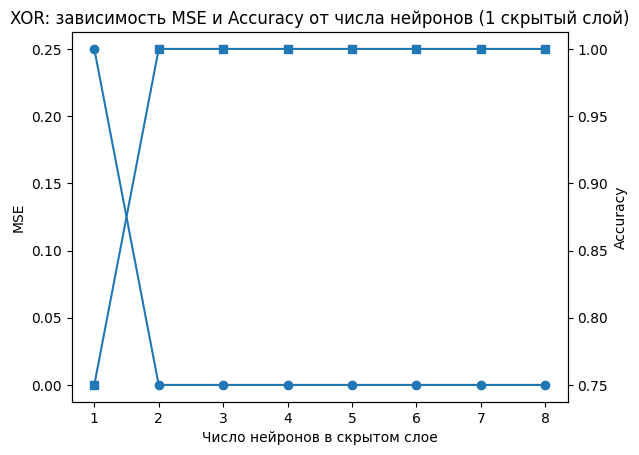

In [2]:
results = []
for h in range(1,9):
    clf = MLPClassifier(hidden_layer_sizes=(h,), activation='logistic', solver='lbfgs', max_iter=10000, random_state=1)
    clf.fit(X_train, y_train)
    yp = clf.predict(X_test)
    results.append((h, mean_squared_error(y_test, yp), accuracy_score(y_test, yp)))
df1 = pd.DataFrame(results, columns=['hidden','mse','accuracy'])
display(df1)

results2 = []
for h1 in range(1,6):
    for h2 in range(1,6):
        clf = MLPClassifier(hidden_layer_sizes=(h1,h2), activation='logistic', solver='lbfgs', max_iter=10000, random_state=1)
        clf.fit(X_train, y_train)
        yp = clf.predict(X_test)
        results2.append((h1,h2, mean_squared_error(y_test, yp), accuracy_score(y_test, yp)))
df2 = pd.DataFrame(results2, columns=['h1','h2','mse','accuracy'])
display(df2.sort_values(['accuracy','mse'], ascending=[False,True]).head(10))

fig, ax1 = plt.subplots()
ax1.plot(df1['hidden'], df1['mse'], marker='o')
ax1.set_xlabel('Число нейронов в скрытом слое')
ax1.set_ylabel('MSE')
ax2 = ax1.twinx()
ax2.plot(df1['hidden'], df1['accuracy'], marker='s')
ax2.set_ylabel('Accuracy')
plt.title('XOR: зависимость MSE и Accuracy от числа нейронов (1 скрытый слой)')
plt.show()


## 2. Определение направления циклического сдвига (4 бита)

In [3]:
from itertools import product
codes = [list(map(int, p)) for p in product([0,1], repeat=4)]
X_shift = []
y_shift = []
for code in codes:
    orig = code
    left = orig[1:]+orig[:1]
    right = orig[-1:]+orig[:-1]
    X_shift.append(orig); y_shift.append(0)
    X_shift.append(left); y_shift.append(1)
    X_shift.append(right); y_shift.append(2)

Xs = np.array(X_shift, dtype=int)
ys = np.array(y_shift, dtype=int)
from sklearn.model_selection import train_test_split
Xtr, Xte, ytr, yte = train_test_split(Xs, ys, test_size=0.25, random_state=2, stratify=ys)
print('Всего:', Xs.shape[0], 'Уникальных:', np.unique(ys))

clf_shift = MLPClassifier(hidden_layer_sizes=(8,), activation='logistic', solver='adam', max_iter=2000, random_state=2)
clf_shift.fit(Xtr, ytr)
print('Точность:', accuracy_score(yte, clf_shift.predict(Xte)))
print('Матрица ошибок:\n', confusion_matrix(yte, clf_shift.predict(Xte)))


Всего: 48 Уникальных: [0 1 2]
Точность: 0.16666666666666666
Матрица ошибок:
 [[1 3 0]
 [3 1 0]
 [1 3 0]]


In [4]:
import warnings
warnings.filterwarnings("ignore")
res_opt = []
for h in [4,8,12,16]:
    for it in [200,500,1000,2000]:
        clf = MLPClassifier(hidden_layer_sizes=(h,), activation='relu', solver='adam', max_iter=it, random_state=2)
        clf.fit(Xtr, ytr)
        acc = accuracy_score(yte, clf.predict(Xte))
        res_opt.append((h,it,acc))
df_opt = pd.DataFrame(res_opt, columns=['hidden','max_iter','accuracy'])
display(df_opt.sort_values('accuracy', ascending=False).head())


,hidden,max_iter,accuracy
1,4,500,0.166667
0,4,200,0.083333
4,8,200,0.083333
8,12,200,0.083333
3,4,2000,0.000000


## 3. Распознавание символов (X, Y, I, C)

In [5]:
def flatten(p):
    return np.array(p).reshape(-1)

X_template = np.array([
    # X
    [1,0,0,0,1,
     0,1,0,1,0,
     0,0,1,0,0,
     0,1,0,1,0,
     1,0,0,0,1],
    # Y
    [1,0,0,0,1,
     0,1,0,1,0,
     0,0,1,0,0,
     0,0,1,0,0,
     0,0,1,0,0],
    # I
    [0,0,1,0,0,
     0,0,1,0,0,
     0,0,1,0,0,
     0,0,1,0,0,
     0,0,1,0,0],
    # C
    [0,1,1,1,0,
     1,0,0,0,1,
     1,0,0,0,0,
     1,0,0,0,1,
     0,1,1,1,0]
], dtype=int)
labels = np.array([0,1,2,3])

X_chars = []
y_chars = []
for lt, lab in zip(X_template, labels):
    for _ in range(80):
        vec = lt.copy().astype(float)
        idx = np.random.choice(len(vec), size=int(0.1*len(vec)), replace=False)
        vec[idx] = 1-vec[idx]
        X_chars.append(vec)
        y_chars.append(lab)
X_chars = np.array(X_chars)
y_chars = np.array(y_chars)

clf_chars = MLPClassifier(hidden_layer_sizes=(32,), activation='relu', solver='adam', max_iter=2000, random_state=3)
clf_chars.fit(X_chars, y_chars)
print('Посимвольная тенировочная точность:', accuracy_score(y_chars, clf_chars.predict(X_chars)))

def noisy_versions(template, noise_level, n=200):
    out = []
    for _ in range(n):
        v = template.copy().astype(float)
        idx = np.random.choice(len(v), size=int(noise_level*len(v)), replace=False)
        v[idx] = 1-v[idx]
        out.append(v)
    return np.array(out)

for nl in [0.0, 0.05, 0.1, 0.2, 0.3]:
    tests = []
    labs = []
    for tlabel, tmpl in zip(labels, X_template):
        vs = noisy_versions(tmpl, nl, n=200)
        tests.append(vs)
        labs += [tlabel]*len(vs)
    tests = np.vstack(tests)
    print(f'Шум {nl}: точность =', accuracy_score(labs, clf_chars.predict(tests)))


Посимвольная тенировочная точность: 1.0
Шум 0.0: точность = 1.0
Шум 0.05: точность = 1.0
Шум 0.1: точность = 1.0
Шум 0.2: точность = 0.9325
Шум 0.3: точность = 0.86


## 4. Искусственный нос (пример)

In [6]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

X = np.array([
    [1.0,  0.05, 0.1,  0.3,  0.07, 0.08, 0.2,  0.05, 0.2, 0.6, 0.8],
    [0.8,  0.4,  0.7,  0.6,  0.1,  0.5,  1.0,  0.75, 0.5, 0.7, 0.8],
    [0.9,  0.2,  0.4,  0.5,  0.1,  0.7,  0.6,  0.5,  0.5, 0.7, 0.8],
    [0.85, 0.7,  0.8,  0.65, 0.1,  0.4,  1.0,  0.7,  0.4, 0.6, 0.7],
    [0.9,  0.3,  0.3,  0.4,  0.04, 0.1,  0.5,  0.3,  0.2, 0.7, 0.8],
    [0.95, 0.18, 0.21, 0.3,  0.05, 0.1,  0.3,  0.2,  0.2, 0.5, 0.7]
])

y = np.array([0, 1, 2, 3, 4, 5])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

clf = MLPClassifier(
    hidden_layer_sizes=(6,),
    activation='relu',
    solver='adam',
    max_iter=5000,
    random_state=42,
    tol=1e-6,
    early_stopping=False
)

clf.fit(X_scaled, y)

y_pred = clf.predict(X_scaled)
accuracy = np.mean(y_pred == y)
print(f"Точность на обучающих данных: {accuracy:.2%}")

Точность на обучающих данных: 100.00%


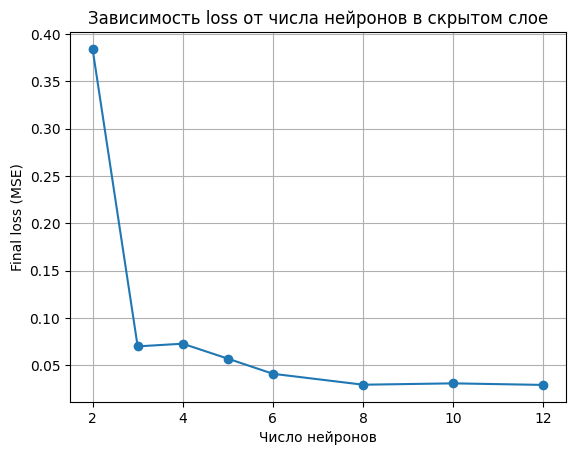

In [7]:
import matplotlib.pyplot as plt

neurons_range = [2, 3, 4, 5, 6, 8, 10, 12]
losses = []

for n in neurons_range:
    model = MLPClassifier(
        hidden_layer_sizes=(n,),
        max_iter=5000,
        random_state=42,
        solver='adam',
        early_stopping=False
    )
    model.fit(X_scaled, y)
    losses.append(model.loss_)

plt.plot(neurons_range, losses, marker='o')
plt.title("Зависимость loss от числа нейронов в скрытом слое")
plt.xlabel("Число нейронов")
plt.ylabel("Final loss (MSE)")
plt.grid(True)
plt.show()

## 5. Прогнозирование временных рядов

In [8]:
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def make_dataset(series, window, horizon):
    X = []
    y = []
    for i in range(len(series)-window-horizon+1):
        X.append(series[i:i+window])
        y.append(series[i+window:i+window+horizon])
    return np.array(X), np.array(y)

t = np.linspace(0,10,500)
series = np.sin(t) + 0.05*np.random.randn(len(t))
window = 25; horizon = 2
Xw, yw = make_dataset(series, window, horizon)
Xtr_w, Xte_w = Xw[:200], Xw[200:300]
ytr_w, yte_w = yw[:200], yw[200:300]

reg = MLPRegressor(hidden_layer_sizes=(50,25), activation='relu', solver='adam', max_iter=2000, random_state=5)
reg.fit(Xtr_w, ytr_w[:,0])
pred = reg.predict(Xte_w)
print('Forecast MSE (step 1):', mean_squared_error(yte_w[:,0], pred))

data = [
 [0.904,75.5,25.2,3343,77],
 [0.922,78.5,21.8,3001,78.2],
 [0.763,78.4,25.7,3101,68],
 [0.923,77.7,17.8,3543,77.2],
 [0.918,84.4,15.9,3237,77.2],
 [0.906,75.9,22.4,3330,77.2],
 [0.905,76,20.6,3808,75.7],
 [0.545,67.5,25.2,2415,62.6],
 [0.894,78.2,20.7,3295,78],
 [0.9,78.1,17.5,3504,78.2],
 [0.932,78.6,19.7,30565,79],
 [0.74,84,18.5,3007,67.6],
 [0.701,59.2,54.4,2844,69.8],
 [0.744,90.2,23,2861,68.4],
 [0.921,72.8,20.2,3259,77.9],
 [0.927,67.7,25.2,3350,78.1],
 [0.802,82.6,22.4,3344,72.5],
 [0.747,74.4,22.7,2704,66.6],
 [0.927,83.3,18.1,3642,76.7],
 [0.721,83.7,20.1,2753,68.8],
 [0.913,73.8,17.3,2916,76.8],
 [0.918,79.2,16.8,3551,78.1],
 [0.833,71.5,29.9,3177,73.9],
 [0.914,75.3,20.3,3280,78.6],
 [0.923,79,14.1,3160,78.5]
]
df_data = pd.DataFrame(data, columns=['a','b','c','d','e'])
display(df_data.head())

X_reg = df_data[['a','b','c','d']].values
y_reg = df_data['e'].values

lr = LinearRegression().fit(X_reg, y_reg)
nnr = MLPRegressor(hidden_layer_sizes=(50,20), activation='relu', solver='adam', max_iter=5000, random_state=6)
nnr.fit(X_reg, y_reg)
print('Линейная R2 на полном датасете:', lr.score(X_reg, y_reg))
print('NNR R2 на полном датасете:', nnr.score(X_reg, y_reg))

print('\nMSE линейн.:', mean_squared_error(y_reg, lr.predict(X_reg)))
print('MSE NNR:', mean_squared_error(y_reg, nnr.predict(X_reg)))


Forecast MSE (step 1): 0.07286862777202527


,a,b,c,d,e
0,0.904,75.5,25.2,3343,77.0
1,0.922,78.5,21.8,3001,78.2
2,0.763,78.4,25.7,3101,68.0
3,0.923,77.7,17.8,3543,77.2
4,0.918,84.4,15.9,3237,77.2


Линейная R2 на полном датасете: 0.9406790912419514
NNR R2 на полном датасете: -473.730447993589

MSE линейн.: 1.3281847066127679
MSE NNR: 10629.131178017613
